In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# RNN, LSTM

In [2]:
from tensorflow.keras import layers

## 간단한 모델 만들기

In [4]:
model = tf.keras.Sequential()

model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.LSTM(128))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


## MNIST 분류

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
sample, sample_label = x_train[0], y_train[0]

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
batch_size = 64
input_dim = 28
units = 64
output_size = 10

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units, input_shape=(None, input_dim)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

In [9]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=5)

Epoch 1/5
938/938 [==============================] - 12s 6ms/step - loss: 0.9436 - accuracy: 0.6974 - val_loss: 0.5507 - val_accuracy: 0.8244
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.4313 - accuracy: 0.8657 - val_loss: 0.4014 - val_accuracy: 0.8594
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.2901 - accuracy: 0.9106 - val_loss: 0.2765 - val_accuracy: 0.9075
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.2197 - accuracy: 0.9337 - val_loss: 0.5310 - val_accuracy: 0.8235
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.1807 - accuracy: 0.9448 - val_loss: 0.3039 - val_accuracy: 0.8989


In [11]:
model.evaluate(x_test, y_test, batch_size=batch_size)

157/157 [==============================] - 1s 3ms/step - loss: 0.3039 - accuracy: 0.8989


[0.3038686215877533, 0.8988999724388123]

## Loss, Accuracy

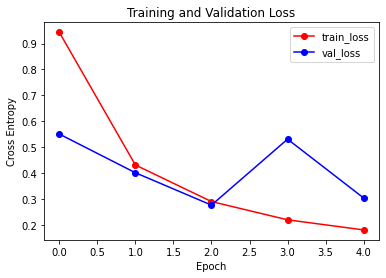

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label='train_loss')
plt.plot(val_loss, 'bo-', label='val_loss')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.show()

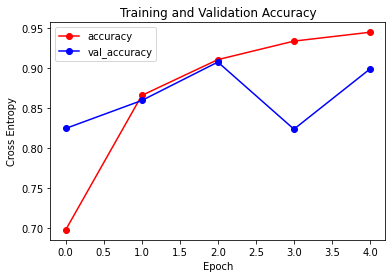

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure()
plt.plot(accuracy, 'ro-', label='accuracy')
plt.plot(val_accuracy, 'bo-', label='val_accuracy')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')
plt.show()

# Word Embedding
> the collective name for a set of language modeling and feature learning techniques in NLP where words and phrases from the vocabulary are mapped to vectors of real numbers. (from Wikipedia)

> 수학적으로, 고차원의 공간을 더 낮은 공간으로 변환하는 방법(embedding)과 같은 의미이기도 하다.

> 결국, 고차원으로 표현된 feature vector(local representation, BOW, TF-IDF 등)을 distributional semantic을 가지는 vector space에 mapping 시켜주는 방법이다.

> <b>"You shall know a word by the company it keeps"(John R. Firth, 1957)<b>, it called "Distributed Hypothesis"

## Word2Vec

In [16]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
from nltk.corpus import movie_reviews
sentences = [list(sent) for sent in movie_reviews.sents()]
sentences[0]

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.']

In [19]:
from gensim.models import Word2Vec

In [21]:
w2v_model = Word2Vec(sentences, min_count=5, size=300, sg=1, iter=10, workers=4, ns_exponent=0.75, window=7)

In [22]:
w2v_model.wv.most_similar('good')

[('decent', 0.5283898711204529),
 ('meaty', 0.48513972759246826),
 ('darned', 0.4830015003681183),
 ('gutsy', 0.47435635328292847),
 ('milestone', 0.46469780802726746),
 ('passable', 0.4637143909931183),
 ('limp', 0.4632647633552551),
 ('qualify', 0.46325933933258057),
 ('untalented', 0.4607251286506653),
 ('commendable', 0.4584238529205322)]

## GloVe
> GloVe는 Gloval Vectors의 약자로, aggregated global word co-occurence statistics를 최적화하는 방향으로 학습하는 word embedding 방법이다. "GloVe: Gloval Vectors for Word Representation(EMNLP 2014)"에 소개되었다.

> Reference : https://nlp.stanford.edu/projects/glove/

In [24]:
!pip install glove_python_binary

     |████████████████████████████████| 948 kB 9.2 MB/s 


In [27]:
from glove import Corpus, Glove

In [29]:
corpus = Corpus()
corpus.fit(sentences, window=5)

glove_model = Glove(no_components=100, learning_rate=0.05)
glove_model.fit(corpus.matrix, epochs=10, no_threads=4, verbose=True)

Performing 10 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


In [30]:
glove_model.add_dictionary(corpus.dictionary)

In [31]:
glove_model.most_similar('good')

[('very', 0.9641238267937599),
 ('bad', 0.9514897578724211),
 ('little', 0.9348994729014967),
 ('pretty', 0.9303499160317955)]

## FastText
> 현재 NLP task에서 word embedding의 baseline으로 사용되는 기법이다. subword embedding model, char n-gram embedding model이라고도 한다.

> word2vec을 만들었던, Tomas Mikolov가 Google에서 Facebook으로 옮긴 뒤에 낸 모델로 word2vec의 단점을 보완한 모델이다.

> word2vec의 단점이었던, OOV 문제와 low frequency를 많이 해결하였다.

> word를 subword 단위로 표현하는 것으로 기본적으로 SGNS 방식이다.

> Reference : https://fasttext.cc/

In [32]:
from gensim.models import FastText

In [35]:
fast_model = FastText(sentences, min_count=5, sg=1, size=100, workers=4, min_n=2, max_n=7, alpha=0.05, iter=10)
fast_model.save('fast_model')

In [45]:
fast_model.wv.most_similar('good')

[('bad', 0.7818659543991089),
 ('decent', 0.6853755712509155),
 ('great', 0.6811846494674683),
 ('nice', 0.6746389269828796),
 ('passable', 0.6048048138618469),
 ('honorable', 0.5571489930152893),
 ('terrible', 0.5493950843811035),
 ('goods', 0.5485054850578308),
 ('gutsy', 0.5482238531112671),
 ('smart', 0.5404434204101562)]